In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("censum_income")

In [3]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df.shape

(32560, 15)

In [5]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [6]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

lets check some information about categorical features in dataset

In [7]:
for column in df.columns:
    if df[column].dtype==object:
        print(str(column)+":"+(str(df[column].unique())))
        print(df[column].value_counts())
        print("---------------------------------------")
    

Workclass:[' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
---------------------------------------
Education:[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Prescho

We can see here that an unidentified data is present in the columns("?")which also has some values present. We will further make any action if it affects the dataframe.

In [8]:
df['Capital_gain'].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1639         1
5060         1
6097         1
1455         1
7978         1
Name: Capital_gain, Length: 119, dtype: int64

In [9]:
df['Capital_loss'].value_counts()

0       31041
1902      202
1977      168
1887      159
1485       51
        ...  
2467        1
1539        1
155         1
2282        1
1411        1
Name: Capital_loss, Length: 92, dtype: int64

LETS PERFORM SOME EDA 

<AxesSubplot:xlabel='Workclass', ylabel='count'>

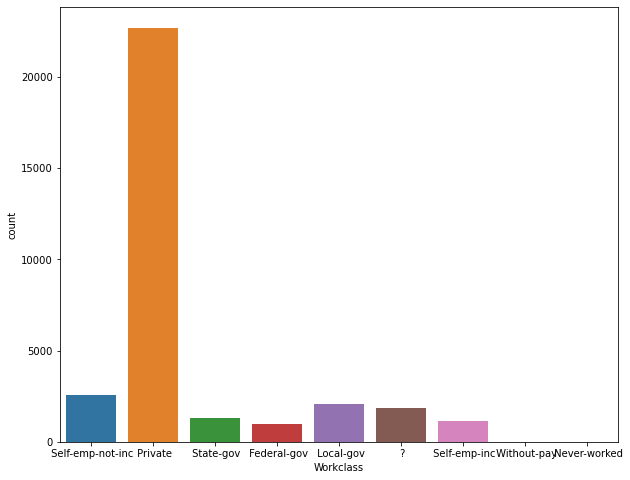

In [10]:
plt.figure(figsize=(10,8))
sns.countplot(df['Workclass'])


maximum members are employed in private companies

<AxesSubplot:xlabel='Education', ylabel='count'>

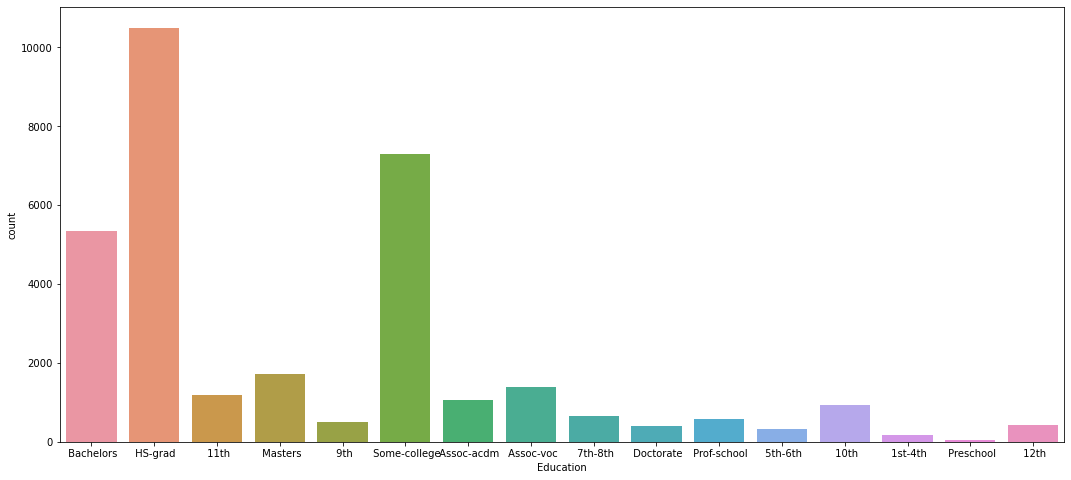

In [11]:
plt.figure(figsize=(18,8))
sns.countplot(df['Education'])


we can see here that maximum people have completed their high school graduation and very less people have low educational profile 

<AxesSubplot:xlabel='Occupation', ylabel='count'>

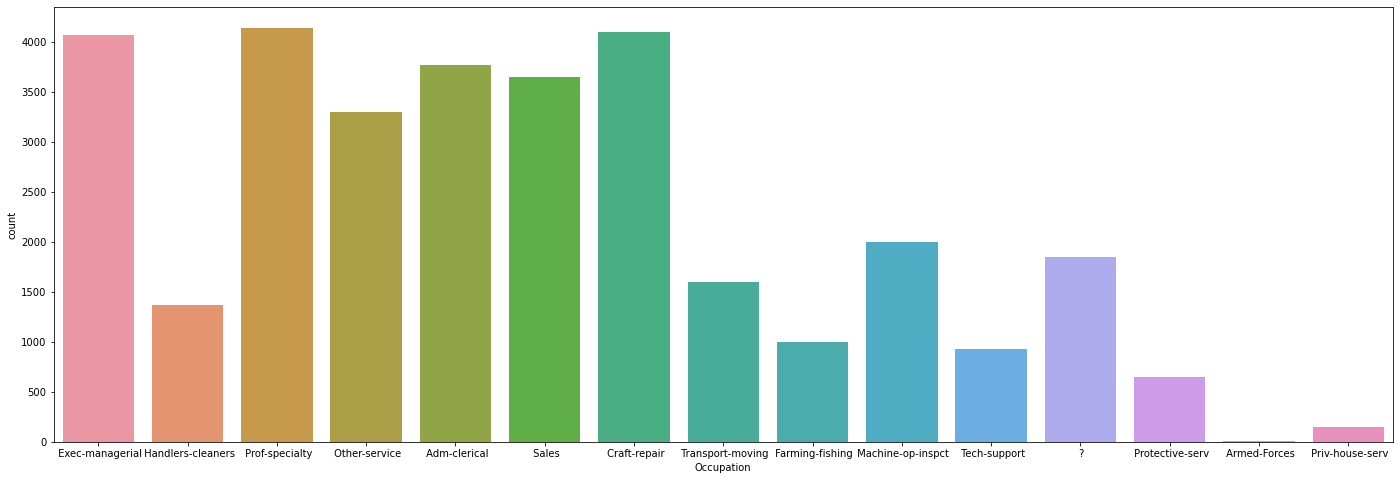

In [12]:
plt.figure(figsize=(24,8))
sns.countplot(df['Occupation'])



<AxesSubplot:xlabel='Income', ylabel='count'>

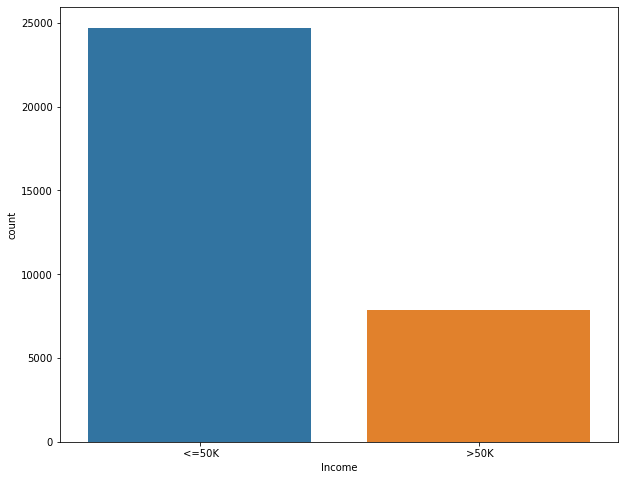

In [13]:
plt.figure(figsize=(10,8))
sns.countplot(df['Income'])


the output column has imbalaned data, which can impact our precision and recall

<AxesSubplot:xlabel='Workclass', ylabel='count'>

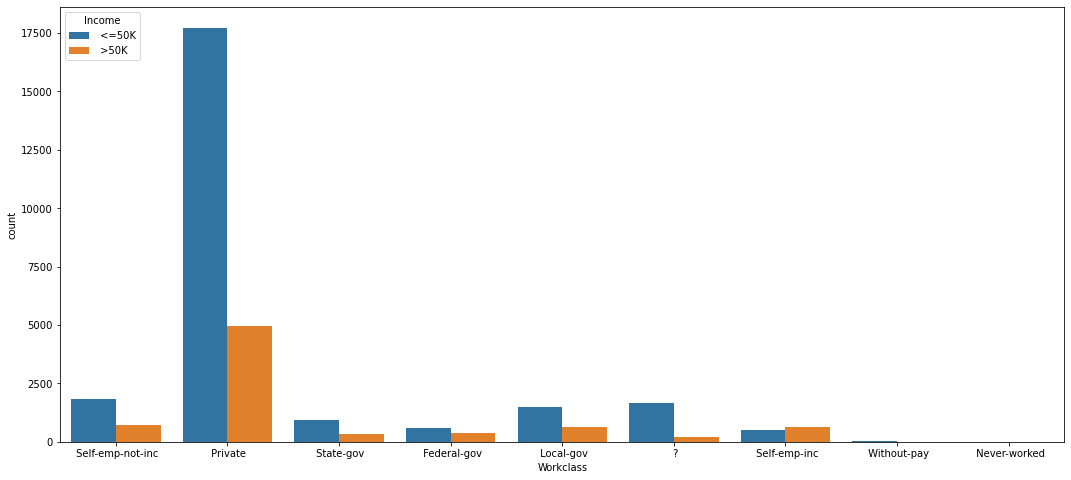

In [14]:
plt.figure(figsize=(18,8))
sns.countplot(x='Workclass',hue='Income',data=df)


in private sector about 80% of the employees are getting paid under 50k

<AxesSubplot:xlabel='Sex', ylabel='count'>

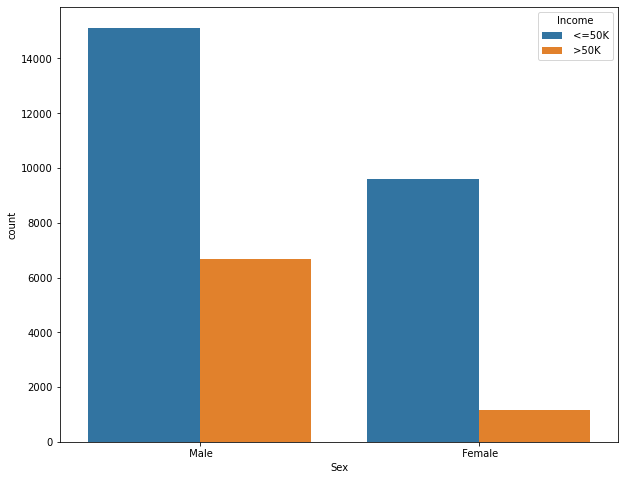

In [15]:
plt.figure(figsize=(10,8))
sns.countplot(x='Sex',hue='Income',data=df)


<AxesSubplot:xlabel='Race', ylabel='count'>

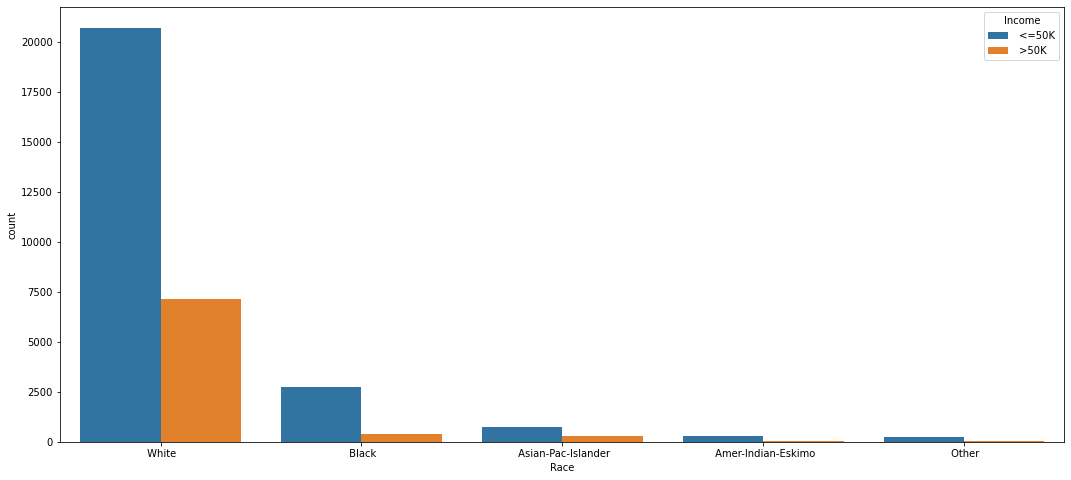

In [16]:
plt.figure(figsize=(18,8))
sns.countplot(x='Race',hue='Income',data=df)

<AxesSubplot:xlabel='Age', ylabel='count'>

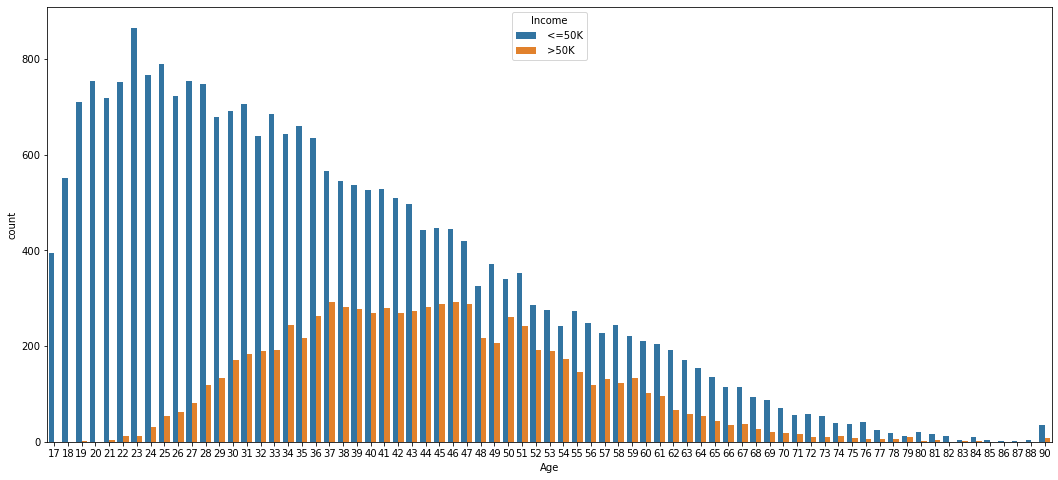

In [17]:
plt.figure(figsize=(18,8))
sns.countplot(x='Age',hue='Income',data=df)

PEOPL EARNING MORE THAN 50K ARE GRADUALLY INCREASING FROM 25 TO 50 

NOW LETS CONVERT THE CATEGORICAL DATA IN TO NUMERICAL DATA

In [18]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list1=['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']
for val in list1:
    df[val]=le.fit_transform(df[val])


In [20]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32558,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


<AxesSubplot:>

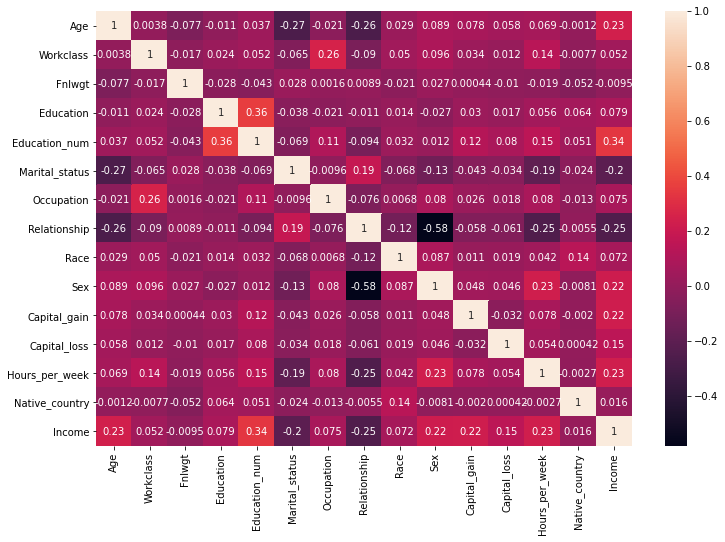

In [21]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

now lets train our model

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [23]:
x=df.drop(["Income"],axis=1)
y=df['Income']

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=100)

In [25]:
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39
32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39
32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,39
32558,22,4,201490,11,9,4,1,3,4,1,0,0,20,39


In [26]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 32560, dtype: int32

In [27]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
predlr=lr.predict(x_test)
print(classification_report(predlr,y_test))
print(accuracy_score(predlr,y_test))
print(confusion_matrix(predlr,y_test))

              precision    recall  f1-score   support

           0       0.95      0.81      0.87      7239
           1       0.29      0.65      0.41       901

    accuracy                           0.79      8140
   macro avg       0.62      0.73      0.64      8140
weighted avg       0.88      0.79      0.82      8140

0.7885749385749385
[[5830 1409]
 [ 312  589]]


we can see that here precision and recall for 0 is good and bad for 1, it must be imbalanced so using SMOTE TO BALANCE

<AxesSubplot:xlabel='Income', ylabel='count'>

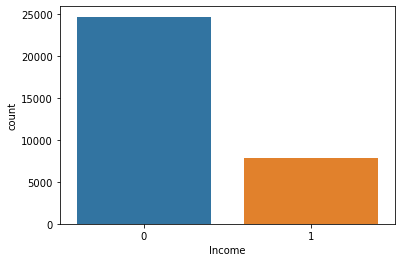

In [28]:
sns.countplot(df['Income'])


In [29]:
from imblearn.over_sampling import SMOTE

In [30]:
smt=SMOTE()
trainx,trainy=smt.fit_resample(x_train,y_train)

In [31]:
trainy.value_counts()

0    18577
1    18577
Name: Income, dtype: int64

In [32]:
x_train,x_test,y_train,y_test=train_test_split(trainx,trainy,test_size=0.25,random_state=100)

In [33]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
predlr=lr.predict(x_test)
print(classification_report(predlr,y_test))
print(accuracy_score(predlr,y_test))
print(confusion_matrix(predlr,y_test))

              precision    recall  f1-score   support

           0       0.93      0.57      0.71      7571
           1       0.30      0.80      0.43      1718

    accuracy                           0.61      9289
   macro avg       0.61      0.69      0.57      9289
weighted avg       0.81      0.61      0.66      9289

0.614059640434923
[[4331 3240]
 [ 345 1373]]


In [34]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(classification_report(preddtc,y_test))
print(accuracy_score(preddtc,y_test))
print(confusion_matrix(preddtc,y_test))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      4565
           1       0.86      0.84      0.85      4724

    accuracy                           0.85      9289
   macro avg       0.85      0.85      0.85      9289
weighted avg       0.85      0.85      0.85      9289

0.8491764452578319
[[3920  645]
 [ 756 3968]]


its accuracy is 84% which is good than logistic regression

In [38]:
from sklearn.neighbors import KNeighborsClassifier


In [39]:
knr=KNeighborsClassifier()
knr.fit(x_train,y_train)
knr.score(x_train,y_train)
predknr=knr.predict(x_test)
print(classification_report(predknr,y_test))
print(accuracy_score(predknr,y_test))
print(confusion_matrix(predknr,y_test))

              precision    recall  f1-score   support

           0       0.66      0.72      0.69      4252
           1       0.75      0.68      0.71      5037

    accuracy                           0.70      9289
   macro avg       0.70      0.70      0.70      9289
weighted avg       0.71      0.70      0.70      9289

0.7015825169555389
[[3078 1174]
 [1598 3439]]


lets now check the accuracy of ensemble technique

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
predrf=rf.predict(x_test)
print(classification_report(predrf,y_test))
print(accuracy_score(predrf,y_test))
print(confusion_matrix(predrf,y_test))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      4648
           1       0.89      0.89      0.89      4641

    accuracy                           0.89      9289
   macro avg       0.89      0.89      0.89      9289
weighted avg       0.89      0.89      0.89      9289

0.891269243190871
[[4157  491]
 [ 519 4122]]


now lets check the cross validation of Random forest and decision tree because they are giving the best output to our problem statement

In [56]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

for decision tree

In [63]:
pred_dtc=dtc.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,pred_dtc)
for j in range(2,10):
    lsscore=cross_val_score(dtc,trainx,trainy,cv=j)
    lsc=lsscore.mean()
    print('at cv:',j)
    print("cross val score is:",lsc*100)
    print("accuracy score is:",lss*100)
    print("/n")

at cv: 2
cross val score is: 81.84044786564031
accuracy score is: 84.91764452578319
/n
at cv: 3
cross val score is: 82.47039929278735
accuracy score is: 84.91764452578319
/n
at cv: 4
cross val score is: 83.96158399685328
accuracy score is: 84.91764452578319
/n
at cv: 5
cross val score is: 84.81735257323862
accuracy score is: 84.91764452578319
/n
at cv: 6
cross val score is: 84.74774091306166
accuracy score is: 84.91764452578319
/n
at cv: 7
cross val score is: 85.0731756551039
accuracy score is: 84.91764452578319
/n
at cv: 8
cross val score is: 85.09226866802216
accuracy score is: 84.91764452578319
/n
at cv: 9
cross val score is: 85.16491407908892
accuracy score is: 84.91764452578319
/n


now lets check for random forest

In [62]:
pred_rf=rf.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,pred_rf)
for j in range(2,10):
    lsscore=cross_val_score(rf,trainx,trainy,cv=j)
    lsc=lsscore.mean()
    print('at cv:',j)
    print("cross val score is:",lsc*100)
    print("accuracy score is:",lss*100)
    print("/n")

at cv: 2
cross val score is: 85.40233415233416
accuracy score is: 89.24534395521584
/n
at cv: 3
cross val score is: 85.7954616872106
accuracy score is: 89.24534395521584
/n
at cv: 4
cross val score is: 85.68796068796068
accuracy score is: 89.24534395521584
/n
at cv: 5
cross val score is: 85.70945945945945
accuracy score is: 89.24534395521584
/n
at cv: 6
cross val score is: 85.6480640985595
accuracy score is: 89.24534395521584
/n
at cv: 7
cross val score is: 85.78320115912324
accuracy score is: 89.24534395521584
/n
at cv: 8
cross val score is: 85.73402948402948
accuracy score is: 89.24534395521584
/n
at cv: 9
cross val score is: 85.87225200653772
accuracy score is: 89.24534395521584
/n


now lets check for other models as well

In [65]:
pred_knr=knr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,pred_knr)
for j in range(2,10):
    lsscore=cross_val_score(knr,trainx,trainy,cv=j)
    lsc=lsscore.mean()
    print('at cv:',j)
    print("cross val score is:",lsc*100)
    print("accuracy score is:",lss*100)
    print("/n")

at cv: 2
cross val score is: 69.4137912472412
accuracy score is: 70.15825169555389
/n
at cv: 3
cross val score is: 70.98832754015669
accuracy score is: 70.15825169555389
/n
at cv: 4
cross val score is: 70.93720145311863
accuracy score is: 70.15825169555389
/n
at cv: 5
cross val score is: 71.27901865398545
accuracy score is: 70.15825169555389
/n
at cv: 6
cross val score is: 71.54014030872844
accuracy score is: 70.15825169555389
/n
at cv: 7
cross val score is: 71.57779483638294
accuracy score is: 70.15825169555389
/n
at cv: 8
cross val score is: 71.62360034453059
accuracy score is: 70.15825169555389
/n
at cv: 9
cross val score is: 71.78240062777326
accuracy score is: 70.15825169555389
/n


lets go with random forest with the final model because it is giving good accuracy on training and testing values in cross validation

In [66]:
from sklearn.model_selection import GridSearchCV


In [67]:
n_estimators=[int(x) for x in np.linspace(start=10,stop=80,num=10)]
max_features=['auto','sqrt']
max_depth=[2,4]
min_samples_split=[2,5]
min_samples_leaf=[1,2]
bootstrap=[True,False]


In [68]:
grid_param={"n_estimators": n_estimators,
           'max_features': max_features,
           'max_depth': max_depth,
           'min_samples_split': min_samples_split,
           'min_samples_leaf': min_samples_leaf,
            'bootstrap': bootstrap}

In [71]:
print(grid_param)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [72]:
rf=RandomForestClassifier()
rf_grid=GridSearchCV(estimator=rf,param_grid=grid_param,cv=3,verbose=2,n_jobs=4)
rf_grid.fit(x_train,y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [73]:
print(rf_grid.best_params_)

{'bootstrap': True, 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 41}


In [76]:
rfc=RandomForestClassifier(n_estimators=41,min_samples_split=2,min_samples_leaf=2,max_features='auto',max_depth=4,bootstrap=True)
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)
predrfc=rfc.predict(x_test)
print(classification_report(predrfc,y_test))
print(accuracy_score(predrfc,y_test))
print(confusion_matrix(predrfc,y_test))

              precision    recall  f1-score   support

           0       0.75      0.89      0.81      3974
           1       0.90      0.78      0.84      5315

    accuracy                           0.83      9289
   macro avg       0.83      0.83      0.83      9289
weighted avg       0.84      0.83      0.83      9289

0.8262460975347184
[[3518  456]
 [1158 4157]]


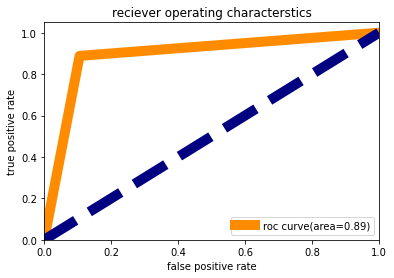

In [77]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(predrf,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='roc curve(area=%0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("reciever operating characterstics")
plt.legend(loc='lower right')
plt.show()

In [78]:
import pickle
filename='censusincome.pkl'
pickle.dump(rf,open(filename,"wb"))